In [1]:
# Numerical and data handling
import numpy as np
import pandas as pd

# Visualization (optional but good)
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    confusion_matrix
)

In [2]:
# Create Dataset
data = {
    'Hours_Studied': [1,2,3,4,5,6,7,8,9,10],
    'Attendance': [60,65,70,72,75,78,80,85,88,90],
    'Internal_Marks': [10,15,20,25,30,35,40,45,48,50],
    'Final_Marks': [35,40,45,50,55,60,65,70,75,80],
    'Result': [0,0,0,0,1,1,1,1,1,1]
}

df = pd.DataFrame(data)
df

,Hours_Studied,Attendance,Internal_Marks,Final_Marks,Result
0,1,60,10,35,0
1,2,65,15,40,0
2,3,70,20,45,0
3,4,72,25,50,0
4,5,75,30,55,1
5,6,78,35,60,1
6,7,80,40,65,1
7,8,85,45,70,1
8,9,88,48,75,1
9,10,90,50,80,1


In [3]:
# Data Inspection

df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hours_Studied   10 non-null     int64
 1   Attendance      10 non-null     int64
 2   Internal_Marks  10 non-null     int64
 3   Final_Marks     10 non-null     int64
 4   Result          10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes


,Hours_Studied,Attendance,Internal_Marks,Final_Marks,Result
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,76.300000,31.800000,57.500000,0.600000
std,3.02765,9.832486,14.109099,15.138252,0.516398
min,1.00000,60.000000,10.000000,35.000000,0.000000
25%,3.25000,70.500000,21.250000,46.250000,0.000000
50%,5.50000,76.500000,32.500000,57.500000,1.000000
75%,7.75000,83.750000,43.750000,68.750000,1.000000
max,10.00000,90.000000,50.000000,80.000000,1.000000


In [4]:
# Check missing values
df.isnull().sum()

Hours_Studied     0
Attendance        0
Internal_Marks    0
Final_Marks       0
Result            0
dtype: int64

In [6]:
# Select Feature & Target
X_log = df[['Hours_Studied', 'Attendance', 'Internal_Marks']]
y_log = df['Result']

In [7]:
# Train Test Split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

In [8]:
# Model Training
logistic_model = LogisticRegression()
logistic_model.fit(X_train_log, y_train_log)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [9]:
# Prediction
y_pred_log = logistic_model.predict(X_test_log)
y_pred_log

array([1, 0])

In [10]:
# Evaluation
accuracy = accuracy_score(y_test_log, y_pred_log)
print("Accuracy:", accuracy)

confusion_matrix(y_test_log, y_pred_log)

Accuracy: 1.0


array([[1, 0],
       [0, 1]])

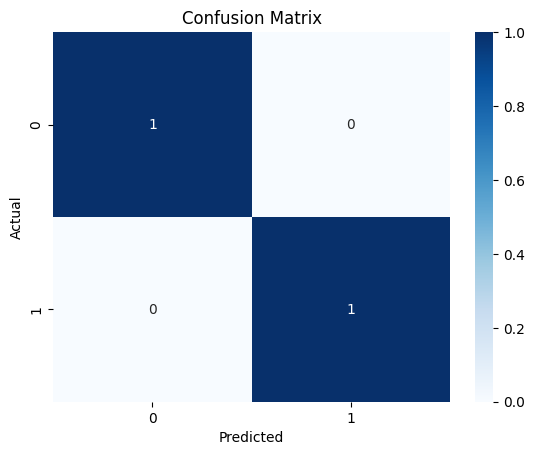

In [11]:
# Confusion Matrix Visualisation
sns.heatmap(confusion_matrix(y_test_log, y_pred_log),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()